In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sto_density import *
import time

In [59]:
class asym_density_field_1D(density_field_1D):
    
    def _rhs(self, y):
        past_psi1 = np.take_along_axis(y, self.d1s, axis=0)[0]
        past_psi2 = np.take_along_axis(y, self.d2s, axis=0)[0]
        
        h1 = self._hill_function(past_psi1 + self.c1*self._roll(past_psi1))
        h2 = self._hill_function(past_psi2 + self.c2*self._roll(past_psi2))

        pos_feedback = self.mu*(h1)
        neg_feedback = self.nu*(1 - h2)

        rhs = pos_feedback + neg_feedback - self.kappa*y[-1]

        return rhs 
    
    def _roll(self,  psi): 
        n1 = np.roll(psi, 1)
        n1[0] = 0
        n2 = np.roll(psi, -1)
        n2[-1] = 0
        return n1 + n2 

In [103]:
kappa = 1
n = 8
tau = 8.6*2
epsilon = 8.6/2 
mu = 1
nu = 1

tau_sigma = 0.1
epsilon_sigma = 0.1
c1 = 0
c2 = 0.4

T = 1e3
dt = 5e-2
n_batches = int(T)
L = 80

noise_amp = 0

m = asym_density_field_1D(mu, nu, kappa, n, tau, epsilon, tau_sigma, epsilon_sigma, c1, c2)
m.initialise(L, T, dt, n_batches, 0, noise_amp)
m.evolve() 

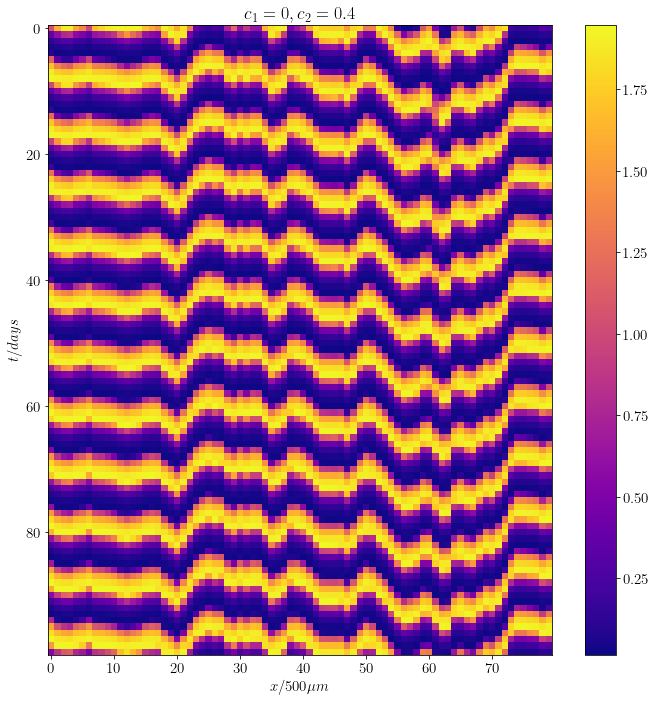

In [104]:
plt.figure(figsize=(10, 10))
plt.rc('font', size=15)
plt.rc('text', usetex=True)

plt.imshow(m.psi[-100:], cmap='plasma', interpolation=None)
plt.colorbar() 
plt.title(r'$c_1={}, c_2={}$'.format(c1, c2))
plt.xlabel(r'$x/500\mu m$')
plt.ylabel(r'$t/days$')
plt.tight_layout()
# plt.savefig('Figures/1d_model.png', dpi=300)
plt.show() 